Notebook cwd: /Users/keith/Documents/Toronto Safety Routes/notebooks
GPKG path: /Users/keith/Documents/Toronto Safety Routes/data/processed/toronto_walk.gpkg
Exists? True


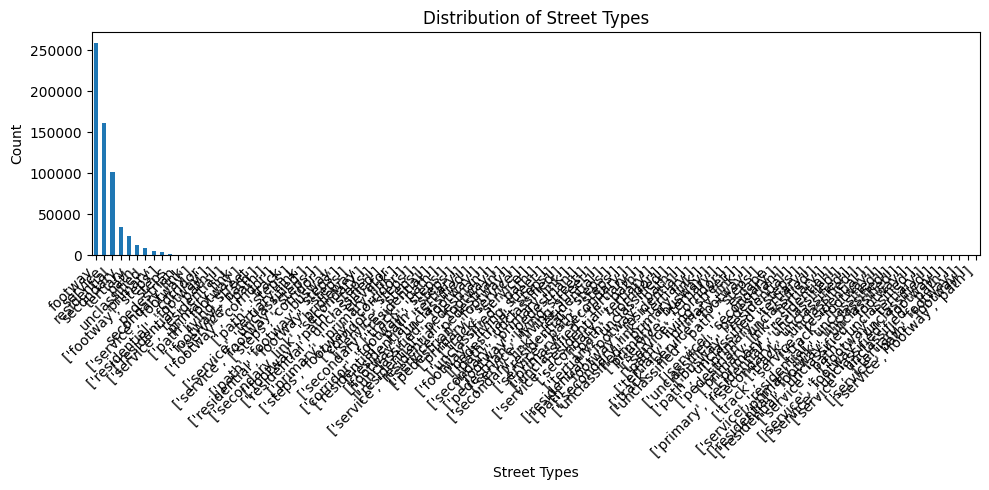

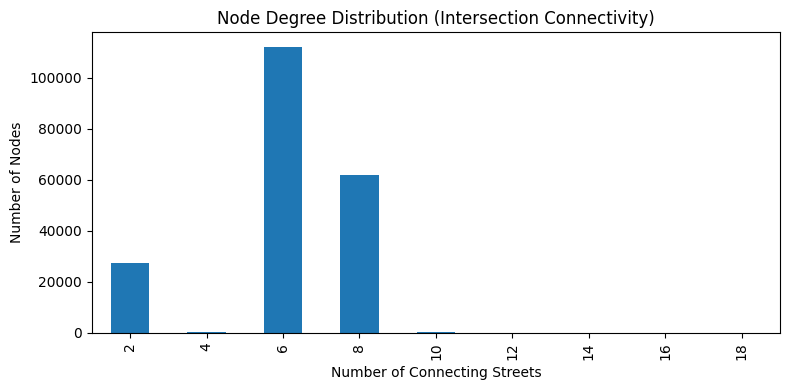

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from pathlib import Path

# path to gpkg
gpkg = (Path.cwd().parent / "data" / "processed" / "toronto_walk.gpkg").resolve()

print("Notebook cwd:", Path.cwd())
print("GPKG path:", gpkg)
print("Exists?", gpkg.exists())

# load layers
edges = gpd.read_file(gpkg, layer="edges", engine="pyogrio")
nodes = gpd.read_file(gpkg, layer="nodes", engine="pyogrio")

# normalize highway column (list -> first value)
edges["highway_clean"] = edges["highway"].apply(
    lambda v: v[0] if isinstance(v, list) and len(v) > 0 else v
)

street_counts = (
    edges["highway_clean"]
    .fillna("missing")
    .value_counts()
)

# plot
ax = street_counts.plot(kind="bar", figsize=(10, 5))
ax.set_title("Distribution of Street Types")
ax.set_xlabel("Street Types")
ax.set_ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# count how many edges connect to each node
node_degree = edges.groupby("u").size() + edges.groupby("v").size()
node_degree = node_degree.fillna(0).astype(int)
degree_counts = node_degree.value_counts().sort_index()
degree_counts.plot(kind="bar", figsize=(8,4))

# plot
plt.title("Node Degree Distribution (Intersection Connectivity)")
plt.xlabel("Number of Connecting Streets")
plt.ylabel("Number of Nodes")
plt.tight_layout()
plt.show()


# end result: 
# - most street types are classified as footway routes which are solely for pedestrian crossing
# - majority has complex 3 or 4 way intersections which contains pedestrian crossing, driving routes, sidewalk walkings, etc. 